## EDA - Proyecto de Telecomunicaciones del ENACOM

1. Importamos nuestros librerias

In [21]:
import requests
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

2. Extraccion de datos desde la API de Enacom
- Mi llave Publica = 3zK0QYEup18ZGz0FP8C6QapoMqaIncCFjop6eKpU

In [2]:
response = requests.get("https://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/?auth_key=3zK0QYEup18ZGz0FP8C6QapoMqaIncCFjop6eKpU")
data = response.json()
guid = []

for item in data:
    if item['category_name'] == 'Acceso a Internet':
        guid.append(item['guid'])

print(len(guid)) # imprimos el total de tablas extraidas
guid # imprimimos el diccionario que contiene cada tabla


17


['CONEC-AL-SERVI-DE-INTER',
 'LISTA-DE-LOCAL-CON-CONEC',
 'PENET-DEL-INTER-FIJO-POR',
 'PENET-DEL-INTER-FIJO-51614',
 'PENET-NACIO-DEL-INTER-FIJO',
 'ACCES-A-INTER-FIJO-62463',
 'ACCES-A-INTER-FIJO-16249',
 'VELOC-PROME-DE-BAJAD-51733',
 'TOTAL-NACIO-DE-ACCES-48866',
 'BANDA-ANCHA-Y-BANDA-ANGOS',
 'ACCES-A-INTER-FIJO-POR',
 'TOTAL-NACIO-DE-ACCES-A',
 'ACCES-A-INTER-FIJO-23248',
 'TOTAL-NACIO-DE-ACCES-32663',
 'ACCES-A-INTER-FIJO-97624',
 'INGRE-POR-LA-OPERA-DEL',
 'INDIC-MACRO']

- Extrayendo los 17 CSVs y guardandolos en el repositorio local:

In [3]:
URL1="http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/"
URL3="/data.csv/?auth_key=CL8hSAFmJRBqJpTClPPA6gx5XhmxXauMpGITST2r"

for i in range (0,len(guid)):
    URL = URL1 + guid[i] + URL3
    response = requests.get(URL)

    nombre = guid[i]
    nombre = nombre + ".csv"
    print(nombre)

    with open(nombre, 'wb') as f:
        f.write(response.content)

    # Guardar los datos en un archivo CSV

    # data = pd.read_csv(nombre)
    data = pd.read_csv(f'./datasets/{nombre}')

# Brindamos una pequenia limpieza a los datos con caracteres especiales
    columnas = data.columns
        
    data.replace("TucumÃ¡n","Tucuman",inplace=True)
    data.replace("EntreRÃ­os","EntreRios",inplace=True)
    data.replace("CÃ³rdoba","Cordoba",inplace=True)
    data.replace("NeuquÃ©n","Neuquen",inplace=True)
    data.replace("RÃ­oNegro","RioNegro",inplace=True)



    for columna in columnas:
        data[columna]= data[columna].fillna(0)
        data[columna]= data[columna].astype(str)
        data[columna]= data[columna].str.replace(".","")
        data[columna]= data[columna].replace(-0,0)
        data[columna]= data[columna].replace("-0",0)
        data[columna]= data[columna].replace("- 0",0)
    

    data.to_csv(nombre,index=False)

CONEC-AL-SERVI-DE-INTER.csv
LISTA-DE-LOCAL-CON-CONEC.csv
PENET-DEL-INTER-FIJO-POR.csv
PENET-DEL-INTER-FIJO-51614.csv
PENET-NACIO-DEL-INTER-FIJO.csv
ACCES-A-INTER-FIJO-62463.csv
ACCES-A-INTER-FIJO-16249.csv
VELOC-PROME-DE-BAJAD-51733.csv
TOTAL-NACIO-DE-ACCES-48866.csv
BANDA-ANCHA-Y-BANDA-ANGOS.csv
ACCES-A-INTER-FIJO-POR.csv
TOTAL-NACIO-DE-ACCES-A.csv
ACCES-A-INTER-FIJO-23248.csv
TOTAL-NACIO-DE-ACCES-32663.csv
ACCES-A-INTER-FIJO-97624.csv
INGRE-POR-LA-OPERA-DEL.csv
INDIC-MACRO.csv


3. Asignando una variable a cada archivo csv extraido

In [4]:

LISTA_DE_LOCAL_CON_CONEC = pd.read_csv('LISTA-DE-LOCAL-CON-CONEC.csv', encoding = 'utf-8') # Provincia
CONEC_AL_SERVI_DE_INTER = pd.read_csv('CONEC-AL-SERVI-DE-INTER.csv', encoding = 'utf-8') # Provincia
BANDA_ANCHA_Y_BANDA_ANGOS = pd.read_csv('BANDA-ANCHA-Y-BANDA-ANGOS.csv', encoding = 'utf-8') # Provincia
TOTAL_NACIO_DE_ACCES_48866 = pd.read_csv('TOTAL-NACIO-DE-ACCES-48866.csv', encoding = 'utf-8')
PENET_DEL_INTER_FIJO_51614 = pd.read_csv('PENET-DEL-INTER-FIJO-51614.csv', encoding = 'utf-8') # Provincia
PENET_NACIO_DEL_INTER_FIJO = pd.read_csv('PENET-NACIO-DEL-INTER-FIJO.csv', encoding = 'utf-8')
TOTAL_NACIO_DE_ACCES_A = pd.read_csv('TOTAL-NACIO-DE-ACCES-A.csv', encoding = 'utf-8')
ACCES_A_INTER_FIJO_POR = pd.read_csv('ACCES-A-INTER-FIJO-POR.csv', encoding = 'utf-8') # Provincia
ACCES_A_INTER_FIJO_23248 = pd.read_csv('ACCES-A-INTER-FIJO-23248.csv', encoding = 'utf-8') # Provincia
ACCES_A_INTER_FIJO_97624 = pd.read_csv('ACCES-A-INTER-FIJO-97624.csv', encoding = 'utf-8') # Provincia
INGRE_POR_LA_OPERA_DEL = pd.read_csv('INGRE-POR-LA-OPERA-DEL.csv', encoding = 'utf-8')
ACCES_A_INTER_FIJO_16249 = pd.read_csv('ACCES-A-INTER-FIJO-16249.csv', encoding = 'utf-8') # Provincia
ACCES_A_INTER_FIJO_62463 = pd.read_csv('ACCES-A-INTER-FIJO-62463.csv', encoding = 'utf-8') # Provincia


INDIC_MACRO = pd.read_csv('INDIC-MACRO.csv', encoding = 'utf-8')

PENET_DEL_INTER_FIJO_POR = pd.read_csv('PENET-DEL-INTER-FIJO-POR.csv', encoding = 'utf-8') # Provincia

TOTAL_NACIO_DE_ACCES_32663 = pd.read_csv('TOTAL-NACIO-DE-ACCES-32663.csv', encoding = 'utf-8')

VELOC_PROME_DE_BAJAD_51733 = pd.read_csv('VELOC-PROME-DE-BAJAD-51733.csv', encoding = 'utf-8') # Dudas

In [89]:
ACCES_A_INTER_FIJO_POR = pd.read_csv('ACCES-A-INTER-FIJO-POR.csv', encoding = 'utf-8') # Provincia

4. Visualizando las tablas extraidas mas importantes (Escogemos 4)
- Penetración de Internet fijo (accesos por cada 100 hogares) = PENET_DEL_INTER_FIJO_51614
- Acceso a Internet fijo por tecnología y provincia = ACCES_A_INTER_FIJO_POR
- Ingresos trimestrales por la prestación del servicio de Internet fijo = INGRE_POR_LA_OPERA_DEL
- Velocidad promedio de bajada = VELOC_PROME_DE_BAJAD_51733

#### a. Penetración de Internet fijo (accesos por cada 100 hogares)

- Transformaciones previas a los datos de penetracion

In [23]:
# Transformaciones de la coma decimal de la columna 'Accesos por cada 100 hogares'
PENET_DEL_INTER_FIJO_51614['Accesos por cada 100 hogares'] = [float(x.replace(',','.')) for x in PENET_DEL_INTER_FIJO_51614['Accesos por cada 100 hogares']]

#PENET_DEL_INTER_FIJO_51614['Año'] = pd.to_datetime(PENET_DEL_INTER_FIJO_51614['Año'], format='%Y')

# Guardar a CSV

PENET_DEL_INTER_FIJO_51614.to_csv('datos.csv', index=False)



- Explorando mis datos

In [24]:
# Rows and Columns
print(f'\n - El numero de filas {PENET_DEL_INTER_FIJO_51614.shape[0]} y de columndas es {PENET_DEL_INTER_FIJO_51614.shape[1]} \n')
# Column Names
a = list(PENET_DEL_INTER_FIJO_51614.columns.values)
print(f'- Los nombres de las columnas son : {a} \n')
# Data Types
print(f'Nombre Columna: \t  Tipo de dato:')
print(PENET_DEL_INTER_FIJO_51614.dtypes)
# Describe
print(' \n')
print(f'-Describe \n\n {PENET_DEL_INTER_FIJO_51614.describe()} \n')
# Null Values
print(f' - Nulos\n\n{PENET_DEL_INTER_FIJO_51614.isna().sum()}')
# head 2
print(PENET_DEL_INTER_FIJO_51614.head())


 - El numero de filas 840 y de columndas es 4 

- Los nombres de las columnas son : ['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'] 

Nombre Columna: 	  Tipo de dato:
Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object
 

-Describe 

                Año   Trimestre  Accesos por cada 100 hogares
count   840.000000  840.000000                    840.000000
mean   2017.885714    2.457143                     49.065750
std       2.528745    1.105009                     23.151885
min    2014.000000    1.000000                      9.350000
25%    2016.000000    1.000000                     32.107500
50%    2018.000000    2.000000                     45.900000
75%    2020.000000    3.000000                     61.865000
max    2022.000000    4.000000                    124.060000 

 - Nulos

Año                             0
Trimestre                    

- Diagrama de Barras

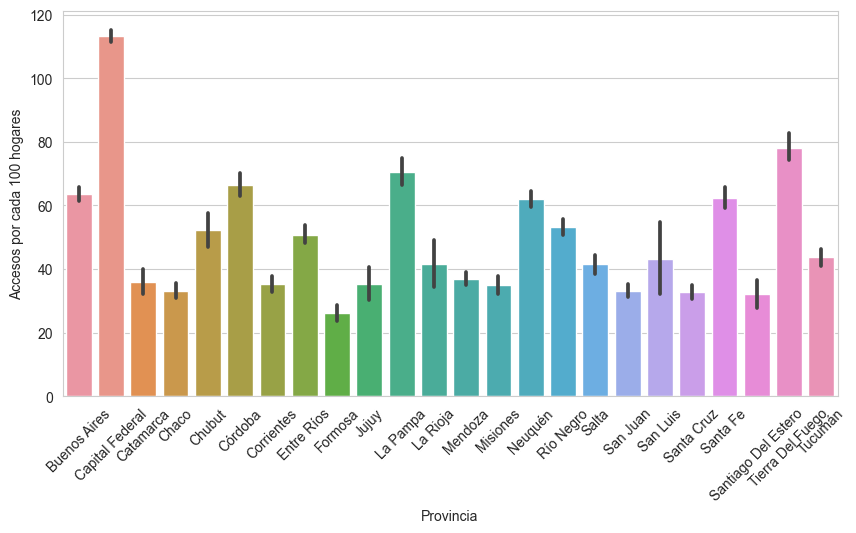

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Provincia", y="Accesos por cada 100 hogares", data=PENET_DEL_INTER_FIJO_51614)
plt.xticks(rotation=45)
plt.show()

- Grafico de Distribucion

<Figure size 800x600 with 0 Axes>

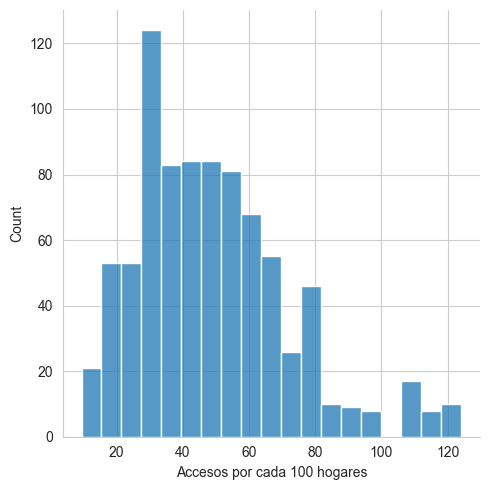

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.displot(PENET_DEL_INTER_FIJO_51614["Accesos por cada 100 hogares"], kde=False)
plt.show()



- Grafico de Cajas

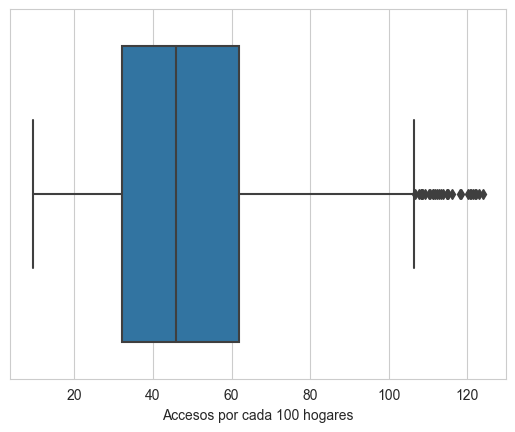

In [33]:
sns.boxplot(x=PENET_DEL_INTER_FIJO_51614["Accesos por cada 100 hogares"])
plt.show()


- Grafico de Linea

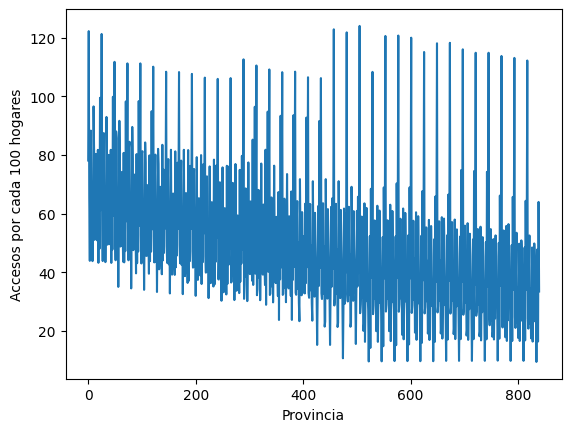

In [29]:
import matplotlib.pyplot as plt

plt.plot(PENET_DEL_INTER_FIJO_51614["Accesos por cada 100 hogares"])
plt.xlabel("Provincia")
plt.ylabel("Accesos por cada 100 hogares")
plt.show()


- Correlacion

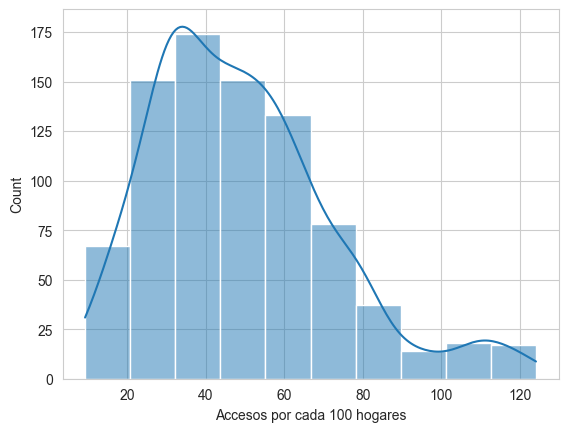

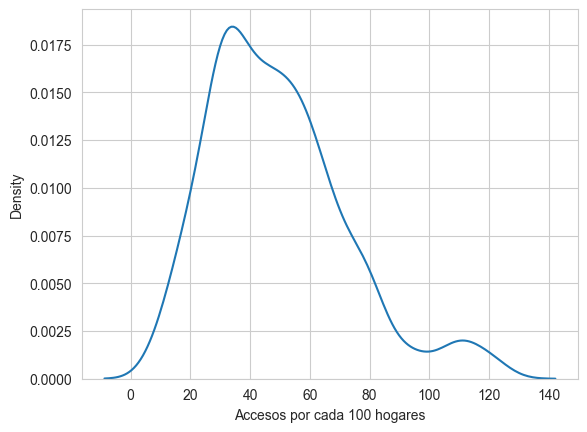

In [42]:
# Crear un histograma de la variable numérica "Accesos por cada 100 hogares"
sns.histplot(data=PENET_DEL_INTER_FIJO_51614, x="Accesos por cada 100 hogares", kde=True, bins=10)
plt.show()

# Crear un gráfico de densidad de la variable numérica "Accesos por cada 100 hogares"
sns.kdeplot(data=PENET_DEL_INTER_FIJO_51614, x="Accesos por cada 100 hogares")
plt.show()






##### Insigth sobre Penetración de Internet fijo (accesos por cada 100 hogares)
- sdgdsfg
- dsfsd

In [29]:
PENET_DEL_INTER_FIJO_51614

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38
...,...,...,...,...
835,2014,1,Santa Cruz,28.94
836,2014,1,Santa Fe,47.85
837,2014,1,Santiago Del Estero,16.31
838,2014,1,Tierra Del Fuego,63.97


- Agrupando suma de accesos por anios

In [24]:
df_grouped_anio = PENET_DEL_INTER_FIJO_51614.groupby('Año')['Accesos por cada 100 hogares'].sum()
df_grouped_anio


Año
2014    3541.64
2015    3763.04
2016    3829.42
2017    4082.47
2018    4653.84
2019    5152.00
2020    5388.54
2021    5949.93
2022    4854.35
Name: Accesos por cada 100 hogares, dtype: float64

In [44]:
PENET_DEL_INTER_FIJO_51614[PENET_DEL_INTER_FIJO_51614['Provincia'] == 'Capital Federal']['Accesos por cada 100 hogares'].sum()

3968.28

#### b. Acceso a Internet fijo por tecnología y provincia = ACCES_A_INTER_FIJO_POR

Transformaciones previas

In [90]:
ACCES_A_INTER_FIJO_POR['Año'] = ACCES_A_INTER_FIJO_POR['Año'].replace('2019 *', '2019')
ACCES_A_INTER_FIJO_POR['Trimestre'] = ACCES_A_INTER_FIJO_POR['Trimestre'].replace('3 *', '3')
ACCES_A_INTER_FIJO_POR['Trimestre'] = ACCES_A_INTER_FIJO_POR['Trimestre'].replace('2 *', '2')
ACCES_A_INTER_FIJO_POR['Trimestre'] = ACCES_A_INTER_FIJO_POR['Trimestre'].replace('1 *', '1')

- Exploracion general de los datos

In [91]:
# Rows and Columns
print(f'\n - Number of rows is {ACCES_A_INTER_FIJO_POR.shape[0]} and the numbers of columns is {ACCES_A_INTER_FIJO_POR.shape[1]} \n')
# Column Names
a = list(ACCES_A_INTER_FIJO_POR.columns.values)
print(f'- The column names are : {a} \n')
# Data Types
print(f'Column name: \t  datatype:')
print(ACCES_A_INTER_FIJO_POR.dtypes)
# Describe
print(' \n')
print(f'-Describe \n\n {ACCES_A_INTER_FIJO_POR.describe()} \n')
# Null Values
print(f' - Nulls\n\n{ACCES_A_INTER_FIJO_POR.isna().sum()}')
# head 2
print(ACCES_A_INTER_FIJO_POR.head())


 - Number of rows is 841 and the numbers of columns is 9 

- The column names are : ['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total'] 

Column name: 	  datatype:
Año             object
Trimestre       object
Provincia       object
ADSL             int64
Cablemodem       int64
Fibra óptica     int64
Wireless         int64
Otros            int64
Total            int64
dtype: object
 

-Describe 

                ADSL    Cablemodem  Fibra óptica       Wireless         Otros   
count  8.410000e+02  8.410000e+02  8.410000e+02     841.000000    841.000000  \
mean   1.274151e+05  1.715708e+05  2.987629e+04    9925.602854   6596.027348   
std    2.549404e+05  4.219563e+05  1.234320e+05   17557.103805  10129.497238   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    2.243800e+04  8.359000e+03  1.860000e+02    1139.000000    750.000000   
50%    4.853900e+04  3.498400e+04  1.093000e+03    4260.000000   273

In [92]:
ACCES_A_INTER_FIJO_POR['Año'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '*'], dtype=object)

In [93]:
ACCES_A_INTER_FIJO_POR['Trimestre'].unique()

array(['3', '2', '1', '4',
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico'],
      dtype=object)

Barras

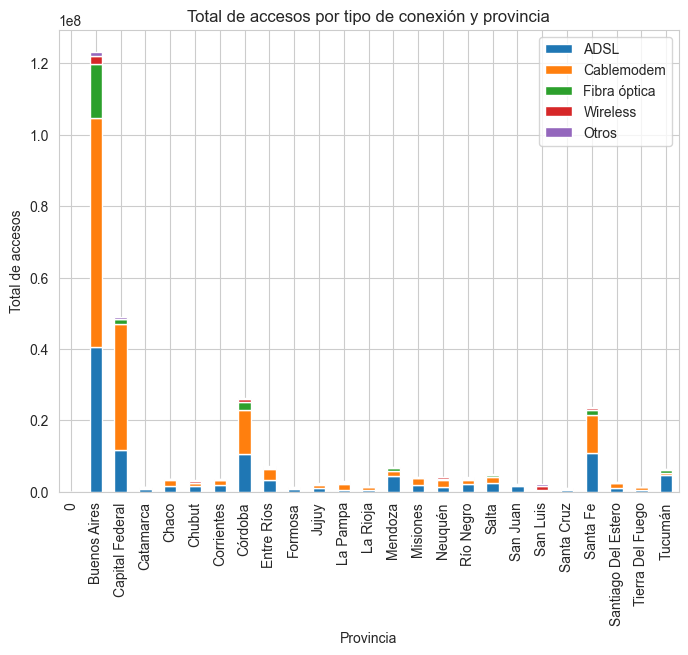

In [86]:
sns.set_style('whitegrid')

# Creamos un DataFrame solo con las columnas que nos interesan
ACCES_A_INTER_FIJO_POR = ACCES_A_INTER_FIJO_POR[['Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]

# Agrupamos por provincia y sumamos los valores
ACCES_A_INTER_FIJO_POR = ACCES_A_INTER_FIJO_POR.groupby('Provincia').sum()

# Creamos el gráfico de barras
ax = ACCES_A_INTER_FIJO_POR.plot(kind='bar', stacked=True, figsize=(8,6))

# Configuramos las etiquetas de los ejes
ax.set_xlabel('Provincia')
ax.set_ylabel('Total de accesos')

# Configuramos el título del gráfico
ax.set_title('Total de accesos por tipo de conexión y provincia')

# Mostramos el gráfico
plt.show()

In [94]:
ACCES_A_INTER_FIJO_POR.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


Valor de Conexiones ADSL en el anio 2021

In [102]:
ACCES_A_INTER_FIJO_POR[ACCES_A_INTER_FIJO_POR['Año']=='2021']['ADSL'].mean()
# Este valor usamos para el KPI de Cable modem

81271.29166666667

Valor de Conexiones Cable Modem en el anio 2021

In [103]:
ACCES_A_INTER_FIJO_POR[ACCES_A_INTER_FIJO_POR['Año']=='2021']['Cablemodem'].mean()

238302.1875

Valor de Conexiones Wireless en el anio 2021

In [105]:
ACCES_A_INTER_FIJO_POR[ACCES_A_INTER_FIJO_POR['Año']=='2021']['Wireless'].mean()

17716.625

Valor de Conexiones Fibra Optica en el anio 2021

In [106]:
ACCES_A_INTER_FIJO_POR[ACCES_A_INTER_FIJO_POR['Año']=='2021']['Fibra óptica'].mean()

67432.35416666667

- Guardado de CSV

In [95]:
ACCES_A_INTER_FIJO_POR.to_csv('tecnologias.csv', index=False)

#### c. Velocidad promedio de bajada

- Tratamiento previo de los datos

In [51]:
VELOC_PROME_DE_BAJAD_51733['Mbps (Media de bajada)'] = [float(x.replace(',','.')) for x in VELOC_PROME_DE_BAJAD_51733['Mbps (Media de bajada)']]

In [53]:
# Rows and Columns
print(f'\n - Number of rows is {VELOC_PROME_DE_BAJAD_51733.shape[0]} and the numbers of columns is {VELOC_PROME_DE_BAJAD_51733.shape[1]} \n')
# Column Names
a = list(VELOC_PROME_DE_BAJAD_51733.columns.values)
print(f'- The column names are : {a} \n')
# Data Types
print(f'Column name: \t  datatype:')
print(VELOC_PROME_DE_BAJAD_51733.dtypes)
# Describe
print(' \n')
print(f'-Describe \n\n {VELOC_PROME_DE_BAJAD_51733.describe()} \n')
# Null Values
print(f' - Nulls\n\n{VELOC_PROME_DE_BAJAD_51733.isna().sum()}')
# head 2
print(VELOC_PROME_DE_BAJAD_51733.head())


 - Number of rows is 35 and the numbers of columns is 4 

- The column names are : ['Año', 'Trimestre', 'Mbps (Media de bajada)', 'Trimestre.1'] 

Column name: 	  datatype:
Año                         int64
Trimestre                   int64
Mbps (Media de bajada)    float64
Trimestre.1                object
dtype: object
 

-Describe 

                Año  Trimestre  Mbps (Media de bajada)
count    35.000000  35.000000               35.000000
mean   2017.885714   2.457143               21.827143
std       2.564135   1.120474               19.230717
min    2014.000000   1.000000                3.620000
25%    2016.000000   1.500000                5.250000
50%    2018.000000   2.000000               13.850000
75%    2020.000000   3.000000               39.495000
max    2022.000000   4.000000               62.460000 

 - Nulls

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64
    Año  Trimestre  Mbps (Media de ba

In [125]:
VELOC_PROME_DE_BAJAD_51733[VELOC_PROME_DE_BAJAD_51733['Trimestre']==3]

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
32,2014,3,3.87,Jul-Sept 2014
28,2015,3,4.79,Jul-Sept 2015
24,2016,3,5.94,Jul-Sept 2016
20,2017,3,8.34,Jul-Sept 2017
16,2018,3,15.36,Jul-Sept 2018
12,2019,3,24.18,Jul-Sept 2019
8,2020,3,40.67,Jul-Sept 2020
4,2021,3,48.46,Jul-Sept 2021
0,2022,3,62.46,Jul-Sept 2022


- Viendo Valores Unicos

In [109]:
VELOC_PROME_DE_BAJAD_51733['Trimestre'].unique()

array([3, 2, 1, 4], dtype=int64)

In [113]:
VELOC_PROME_DE_BAJAD_51733['Año'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

Valor de Velocidad de bajada en el anio 2021

In [115]:
VELOC_PROME_DE_BAJAD_51733[VELOC_PROME_DE_BAJAD_51733['Año']==2021]['Mbps (Media de bajada)'].mean()

47.385000000000005

Valor minimo y maximo de velocidad

In [127]:
print(VELOC_PROME_DE_BAJAD_51733['Mbps (Media de bajada)'].max())
print(VELOC_PROME_DE_BAJAD_51733['Mbps (Media de bajada)'].min())

62.46
3.62


Guardando el archivo csv

In [111]:
VELOC_PROME_DE_BAJAD_51733.to_csv('velocidad.csv', index=False)

- Gráfico de línea

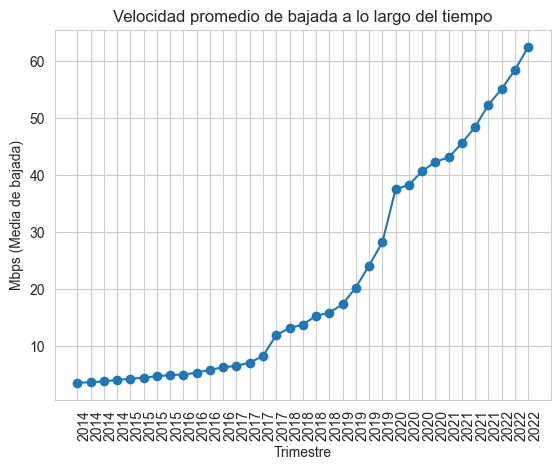

In [117]:
# Ordenar los datos por año y trimestre ascendente
VELOC_PROME_DE_BAJAD_51733 = VELOC_PROME_DE_BAJAD_51733.sort_values(["Año", "Trimestre"])

plt.plot(VELOC_PROME_DE_BAJAD_51733["Año"].astype(str) + "Q" + VELOC_PROME_DE_BAJAD_51733["Trimestre"].astype(str), VELOC_PROME_DE_BAJAD_51733["Mbps (Media de bajada)"], marker="o")
plt.xlabel("Trimestre")
plt.ylabel("Mbps (Media de bajada)")
plt.title("Velocidad promedio de bajada a lo largo del tiempo")

# Establecer el orden de las etiquetas del eje x
plt.xticks(range(len(VELOC_PROME_DE_BAJAD_51733)), VELOC_PROME_DE_BAJAD_51733["Año"].astype(str), rotation=90, ha="left")

plt.show()

- Gráfico de barras

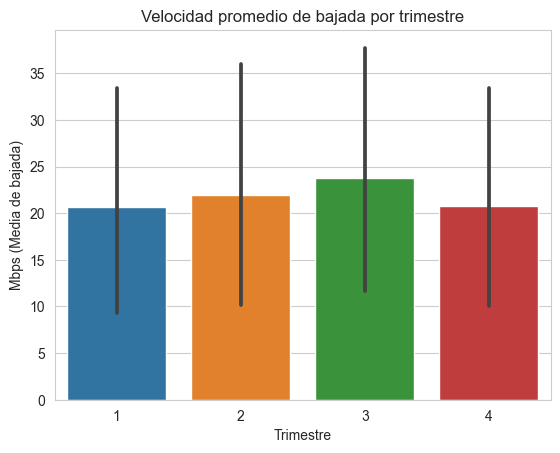

In [57]:
sns.barplot(x="Trimestre", y="Mbps (Media de bajada)", data=VELOC_PROME_DE_BAJAD_51733)
plt.xlabel("Trimestre")
plt.ylabel("Mbps (Media de bajada)")
plt.title("Velocidad promedio de bajada por trimestre")
plt.show()

- Histograma

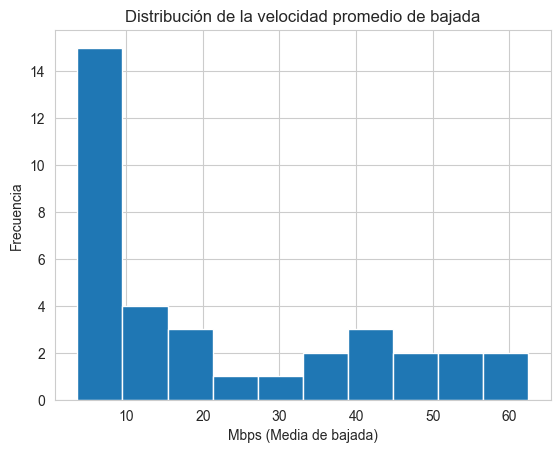

In [58]:
plt.hist(VELOC_PROME_DE_BAJAD_51733["Mbps (Media de bajada)"], bins=10)
plt.xlabel("Mbps (Media de bajada)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la velocidad promedio de bajada")
plt.show()

#### d. Ingresos trimestrales por la prestación del servicio de Internet fijo

In [13]:
# Rows and Columns
print(f'\n - Number of rows is {INGRE_POR_LA_OPERA_DEL.shape[0]} and the numbers of columns is {INGRE_POR_LA_OPERA_DEL.shape[1]} \n')
# Column Names
a = list(INGRE_POR_LA_OPERA_DEL.columns.values)
print(f'- The column names are : {a} \n')
# Data Types
print(f'Column name: \t  datatype:')
print(INGRE_POR_LA_OPERA_DEL.dtypes)
# Describe
print(' \n')
print(f'-Describe \n\n {INGRE_POR_LA_OPERA_DEL.describe()} \n')
# Null Values
print(f' - Nulls\n\n{INGRE_POR_LA_OPERA_DEL.isna().sum()}')
# head 2
print(INGRE_POR_LA_OPERA_DEL.head())


 - Number of rows is 35 and the numbers of columns is 4 

- The column names are : ['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'] 

Column name: 	  datatype:
Año                           int64
Trimestre                     int64
Ingresos (miles de pesos)     int64
Periodo                      object
dtype: object
 

-Describe 

                Año  Trimestre  Ingresos (miles de pesos)
count    35.000000  35.000000               3.500000e+01
mean   2017.885714   2.457143               2.058845e+07
std       2.564135   1.120474               1.774214e+07
min    2014.000000   1.000000               2.984054e+06
25%    2016.000000   1.500000               6.235543e+06
50%    2018.000000   2.000000               1.431947e+07
75%    2020.000000   3.000000               3.204996e+07
max    2022.000000   4.000000               6.705593e+07 

 - Nulls

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtyp

In [120]:
INGRE_POR_LA_OPERA_DEL.head(20)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67055930,Jul-Sept 2022
1,2022,2,60335724,Abr-Jun 2022
2,2022,1,55589997,Ene-Mar 2022
3,2021,4,45467887,Oct-Dic 2021
4,2021,3,42999944,Jul-Sept 2021
5,2021,2,38239667,Abr-Jun 2021
6,2021,1,36676371,Ene-Mar 2021
7,2020,4,33539703,Oct-Dic 2020
8,2020,3,31997445,Jul-Sept 2020
9,2020,2,32102476,Abr-Jun 2020


In [58]:
INGRE_POR_LA_OPERA_DEL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     int64 
 3   Periodo                    35 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


Guardando el archivo CSV

In [118]:
INGRE_POR_LA_OPERA_DEL.to_csv('ingresos.csv', index=False)

Promedio de ingreso del anio 2021

In [119]:
INGRE_POR_LA_OPERA_DEL[INGRE_POR_LA_OPERA_DEL['Año']==2021]['Ingresos (miles de pesos)'].mean()

40845967.25

- Gráfico de barras

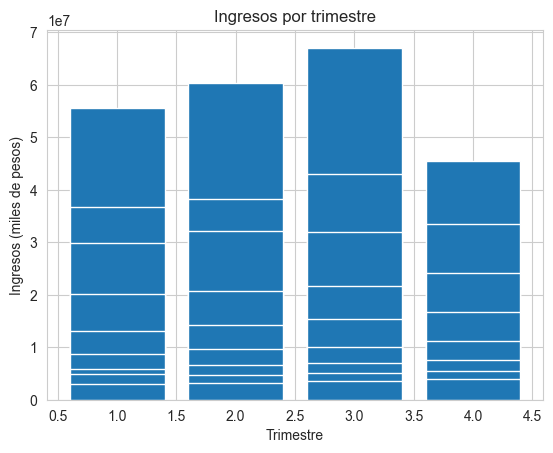

In [59]:
plt.bar(INGRE_POR_LA_OPERA_DEL['Trimestre'], INGRE_POR_LA_OPERA_DEL['Ingresos (miles de pesos)'])
plt.title('Ingresos por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()

- Gráfico de línea

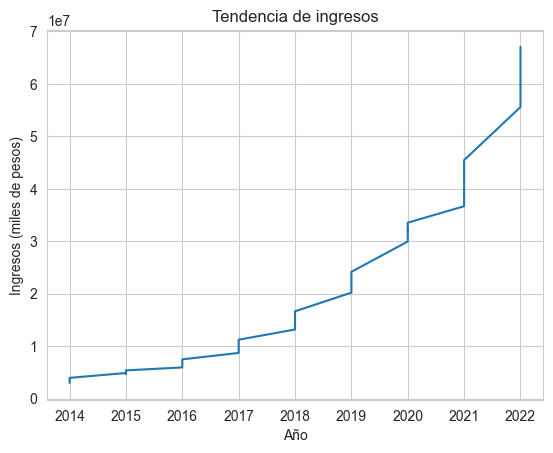

In [60]:
plt.plot(INGRE_POR_LA_OPERA_DEL['Año'], INGRE_POR_LA_OPERA_DEL['Ingresos (miles de pesos)'])
plt.title('Tendencia de ingresos')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()

- Gráfico de dispersión

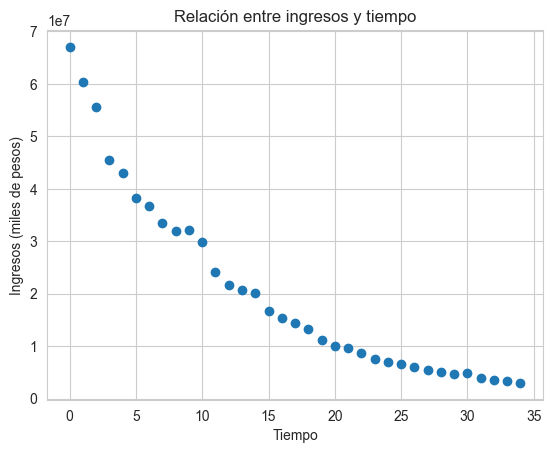

In [61]:
plt.scatter(INGRE_POR_LA_OPERA_DEL.index, INGRE_POR_LA_OPERA_DEL['Ingresos (miles de pesos)'])
plt.title('Relación entre ingresos y tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()

- Gráfico de caja

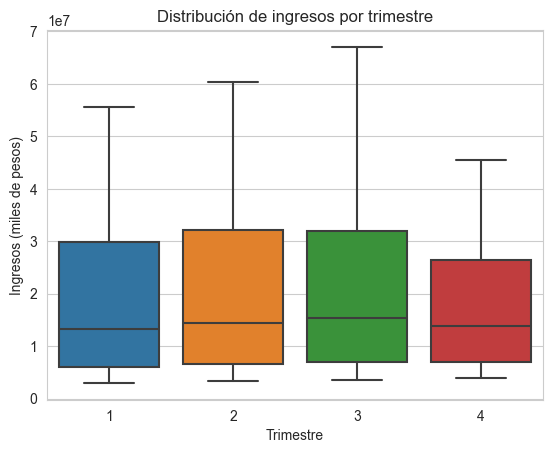

In [62]:
sns.boxplot(x=INGRE_POR_LA_OPERA_DEL['Trimestre'], y=INGRE_POR_LA_OPERA_DEL['Ingresos (miles de pesos)'])
plt.title('Distribución de ingresos por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()

Valor maximo de ingreso en el periodo 3

In [129]:
INGRE_POR_LA_OPERA_DEL[INGRE_POR_LA_OPERA_DEL['Trimestre']==3]['Ingresos (miles de pesos)'].max()

67055930

Valor maximo de ingreso en el periodo 2

In [130]:
INGRE_POR_LA_OPERA_DEL[INGRE_POR_LA_OPERA_DEL['Trimestre']==2]['Ingresos (miles de pesos)'].max()

60335724